*Data about covid are valid as of 18/11/2020.

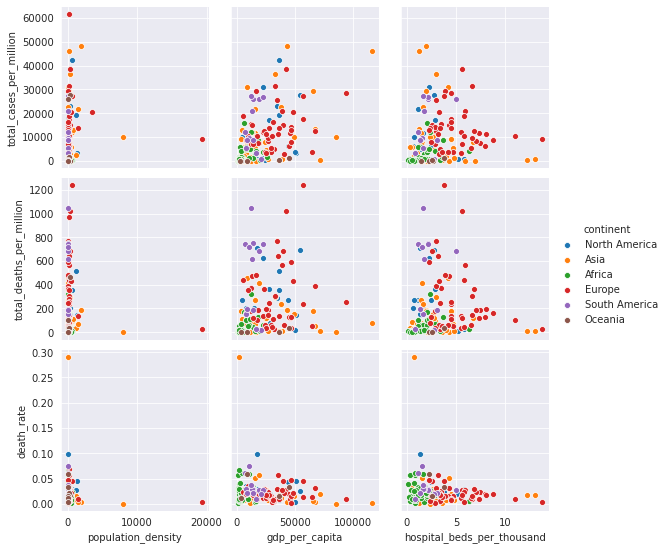

In [33]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate']);




#### From the diagrams of `population_density` we see that we can not draw any conclusion because there is a wide range of values. Something that can be seen more clearly in the following histogram (power-law distribution). This is because we have a large number of very small values [0,1000] at the same time with very large values (outliers) close to 10,000 and 20,000 as it seems they 'spoil' the regularity of our distribution.
#### To understand the type of distribution we need to get the log-log plot.

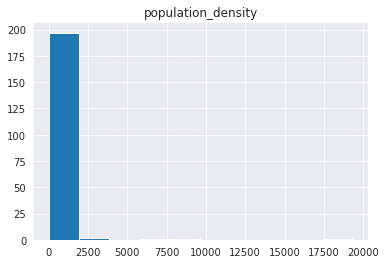

In [34]:
df.hist(column='population_density');

### Auxiliary functions for Pearson Correlation Coefficient and p-values calculations.

In [35]:
# Pearson Correlation Coefficient and p-values function
from scipy.stats import pearsonr

def correlationCoefficient(flag=0):
    values = []
    if flag==0:
        pair1 = df.dropna(subset = ['population_density', 'death_rate'], how ='any')
        values.append(pearsonr(pair1.population_density, pair1.death_rate))

        pair2 = df.dropna(subset = ['population_density', 'total_deaths_per_million'], how ='any')
        values.append(pearsonr(pair2.population_density, pair2.total_deaths_per_million))

        pair3 = df.dropna(subset = ['population_density', 'total_cases_per_million'], how ='any')
        values.append(pearsonr(pair3.population_density, pair3.total_cases_per_million))
    
    elif flag==1:
            pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
            values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

            pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
            values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

            pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
            values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))
    
    pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
    values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

    pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
    values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

    pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
    values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

    pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
    values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

    pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
    values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

    pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
    values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
    
    printPearson(values, flag)

from prettytable import PrettyTable
def printPearson(values, flag):
    t = PrettyTable(['Pearson Correlation Coefficient','death_rate', 'total_deaths_per_million','total_cases_per_million'])
    if flag==0: t.add_row(['population_density', values[0][0], values[1][0],values[2][0]])
    else: t.add_row(['log_population_density', values[0][0], values[1][0],values[2][0]])
    t.add_row(['gdp_per_capita', values[3][0], values[4][0], values[5][0]])
    t.add_row(['hospital_beds_per_thousand', values[6][0], values[7][0], values[8][0]])
    print(t)
    t = PrettyTable(['p-value', 'death_rate', 'total_deaths_per_million','total_cases_per_million'])
    if flag==0: t.add_row(['population_density', values[0][1], values[1][1],values[2][1]])
    else: t.add_row(['log_population_density', values[0][1], values[1][1],values[2][1]])
    t.add_row(['gdp_per_capita', values[3][1], values[4][1], values[5][1]])
    t.add_row(['hospital_beds_per_thousand', values[6][1], values[7][1], values[8][1]])
    print(t)

### Results of PCC & p-values.

In [36]:
correlationCoefficient()

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|        population_density       | -0.10000651310915307 |  -0.058397547975040334   |   0.062125559569446515  |
|          gdp_per_capita         | -0.14965474185667882 |    0.2541340058740727    |    0.5159806204623202   |
|    hospital_beds_per_thousand   |  -0.184789549051784  |   0.05864998409761146    |    0.1423786439787726   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

## Pearson Correlation Coefficient
$\;\;\;$From the Pearson Correlation Coefficients measurements we see if there is any possible -or not- linear correlation between our indexes and characteristics. Thus, we observe that there is no evidence that there is a correlation between the index ***total_deaths_per_million*** and ***hospital_beds_per_thousand***, ***population_density***, while for the same index with respect to ***gdp_per_capita*** there is a small correlation.
<br>$\;\;\;$For the ***death_rate*** index the correlations with the characteristics ***population_density*** and ***gdp_per_capita*** are negligible, while there could be a slight negative correlation with ***hospital_beds_per_thousand***. <br> $ \; \; \; $For the index ***total_cases_per_million*** and ***gdp_per_capita*** there is a strong correlation. This means that we can assume that as one increases the other increases, but this is not the only reason this happens, ie it is not certain that the increase of ***total_cases_per_million*** is directly responsible for the areas that are increased and ***gdp_per_capita***, as for ***population_density*** and ***hospital_beds_per_thousand*** it is safe to assume that there is no significant correlation<br> $\;\;\;$
## p-values
$\;\;\;$The p-values essentially tell us whether the results of the calculations are of statistical interest. The pairs we are interested in are those with p-values between ***x <= 0.01, x <= 0.05*** and ***x <= 0.1***. According to this the index ***death_rate*** and the ***gdp_per_capita*** and ***hospital_beds_per_thousand*** are of statistical interest while the pair ***total_deaths_per_million*** and ***gdp_per_capita*** are demonstrating interest. Also of interest is the index ***total_cases_per_million*** and ***hospital_beds_per_thousand***, while the strongest relation of the calculations we observe is for the same index and the ***gdp_per_capita***.
## Summary 
<br>$\;\;\;$Of all the above, there is interest for further study mainly in the pairs **<gdp_per_capita, total_deaths_per_million>** and **<gdp_per_capita, total_deaths_per_million>** because while they have a correlation between them in addition they are also statistically interesting in terms of values of the p-values they have.
<br><br>$\;\;\;$*Obviously the above are some assumptions which may not be valid because the calculations require a normal distribution of our data sets, something that does not apply to all the indexes and features we study..*

### Repeat the calculations this time for logarithm `population_density`.

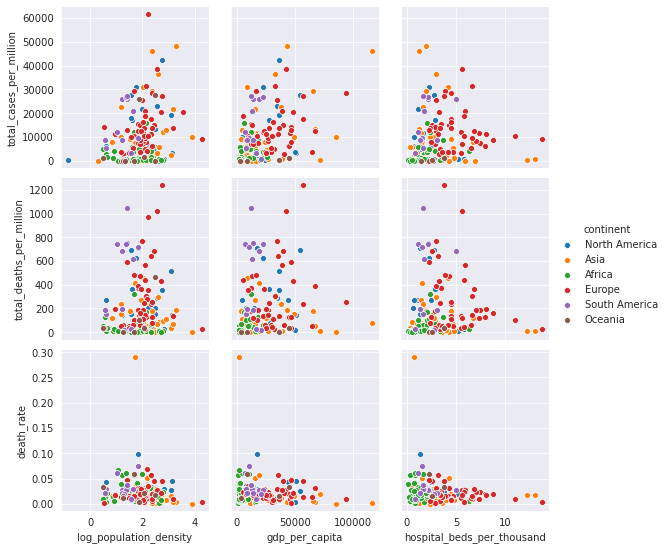

In [37]:
# Take the log of population_density
df['log_population_density'] = np.log10(df['population_density'])
df = df.drop(columns = ['population_density'])

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate']);

In [38]:
# Calculate new Pearson Correlation Coefficients and p-values for log_population_density
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|      log_population_density     | -0.13084081983701423 |   0.01163448498135465    |   0.19801683582445173   |
|          gdp_per_capita         | -0.14965474185667882 |    0.2541340058740727    |    0.5159806204623202   |
|    hospital_beds_per_thousand   |  -0.184789549051784  |   0.05864998409761146    |    0.1423786439787726   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

## Pearson Correlation Coefficient & p-values
$\;\;\;$After the modification we notice a big change in the index *** total_cases_per_million *** where now there is definitely a stronger correlation with the logarithm of ***population_density***.
We also see a huge change in the p-value index of the pair **<population_density, total_cases_per_million**> which means that they are probably of statistical interest.


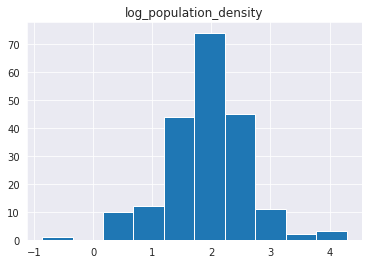

In [39]:
df.hist(column='log_population_density');

#### From the histogram we see that taking the log-log plot drastically reduced the range of values and our data seem to follow the normal distribution, something we want.

$\;\;\;$For African countries we observe that there are no large fluctuations in terms of indexes and characteristics, that is, in contrast to the other continents we see that African countries are accumulated at specific value intervals, there are not many extreme values between its countries, something which does not apply to the other continents as shown in the diagrams between the same continents there are much more outliers, which does not apply to Africa as clearly shown in the following histograms.<br>
$\;\;\;$Simplistically we see in the diagrams that while countries of different continents 'spread' along the entire length and width of the diagrams, the African countries are grouped without having extreme cases. If we take the log-log plots of the indexes and some characteristics of Africa we will be much closer to a normal distribution compared to the other continents where the indexes and their characteristics have a much wider range of values. The countries between Africa are more similar, which is not the case on the other continents.

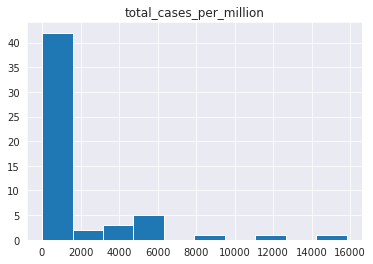

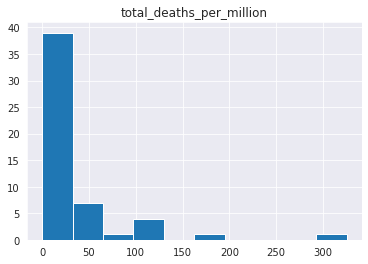

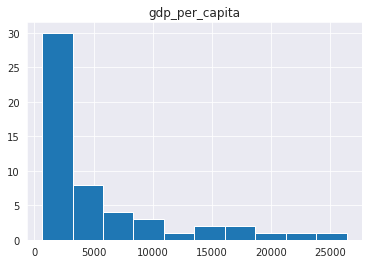

In [40]:
africa = df.loc[df.continent=='Africa']
africa.hist(column='total_cases_per_million');
africa.hist(column='total_deaths_per_million');
africa.hist(column='gdp_per_capita');

### Removal of African countries.

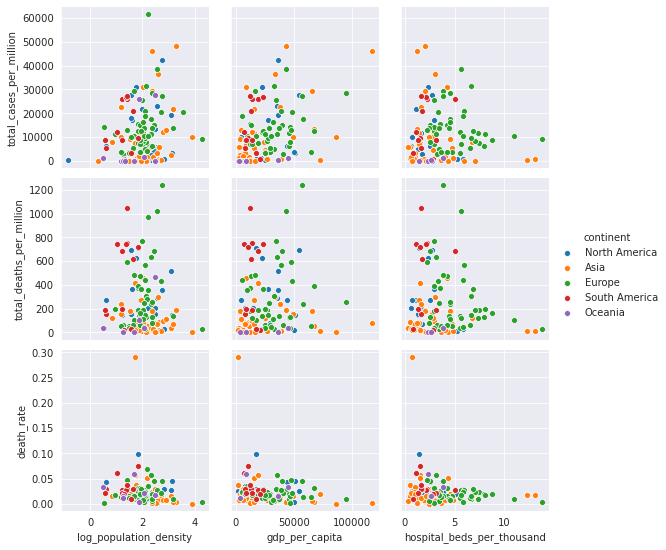

In [41]:
# Without African continent
df = df.loc[df.continent != 'Africa']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate']);

In [42]:
# Calculate again the Pearson Correlation Coefficient and p-values without African continent
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|      log_population_density     | -0.14181218461421508 |   -0.0829348431486697    |    0.1728580247964166   |
|          gdp_per_capita         | -0.1922099702749785  |   0.07905175694387796    |    0.417222039331797    |
|    hospital_beds_per_thousand   | -0.20740573139650811 |   -0.08403396676290859   |   0.00961541337152054   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

$\;\;\;$Without Africa we observe an expected decrease in the correlation between **gpd_per_capita** and **total_deaths_per_million**, as it has the lowest values of **gpd_per_capita**. This is of course useful for our analysis, because before the removal of Africa one would say that there is a good case of correlation between the two (index-characteristic), nevertheless we see that in this result of the calculation of the Pearson correlation coefficient played a very large role of Africa. We now see that there is no correlation between the two or any statistical interest. We also see that **hospital_beds_per_thousand** and **total_cases_per_million** also have no statistical interest as African countries also have the lowest number of beds, which seemed to affect the **total_cases_per_million** index, which obviously we now see that it does not matter.<br>
$\;\;\;$So overall we see that the low extreme values of the African continent would lead us to the wrong conclusions about various characteristics and how the indicators are affected by them in relation to the rest of the world. It would be better to look at each continent separately to get a clearer picture.

### Repeat the calculations this time only for Europe.

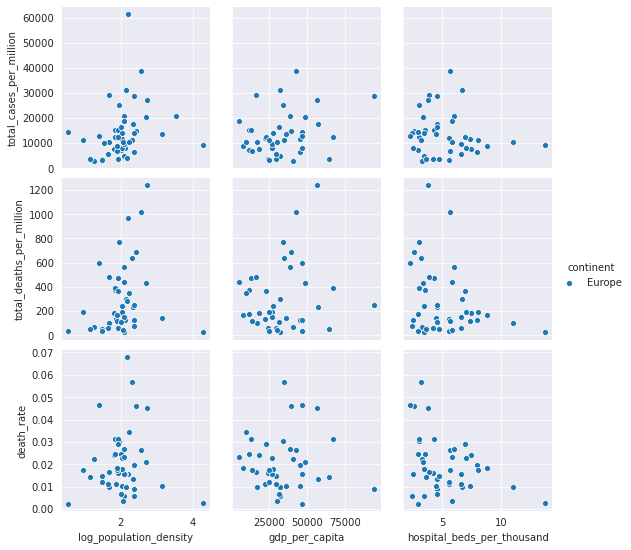

In [43]:
# Only European countries
df = df.loc[df.continent == 'Europe']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate']);

In [44]:
# Calculate again the Pearson Correlation Coefficient and p-values for Europe
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|      log_population_density     | 0.042240445009964586 |   0.22559693306395764    |    0.2418379253659753   |
|          gdp_per_capita         | -0.00805627790140381 |   0.15090242575512589    |   0.25657713292004464   |
|    hospital_beds_per_thousand   | -0.33914442154125063 |   -0.2759067046225694    |   -0.13101030755302753  |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+---------------------+--------------------------+-------------------------+
|          p-value           |      death_rate     | total_deaths_per_million | total_cases_per_million |
+---

$\;\;\;$We first observe that Europe is the opposite of Africa - that is, its countries have the largest value range for each pair <characteristic, index>. They 'spread' more than any other continent, showing a heterogeneity and that it is a continent with countries of "different speeds" (in terms of value pairs). Compared to the initial measurements there is a significant difference between the value for **hospital_beds_per_thousand** and the **death rate** where they are negatively correlated, ie as the value of the attribute increases our value decreases, again this is not unique to this reason. For the same feature we notice a very large change again in terms of the value **total_deaths_pers_million**, where we see you create a negative correlation, as for the index **total_cases_per_million** to a lesser extent.<br> <br>
$\;\;\;$Regarding **p_values** we notice significant changes for **log_population_density** where compared to before it changes drastically for the indexes **death_rate** and **total_cases_per_million**, thus showing us that there is no possible statistic interest in these measurements. The same goes for each indicator for the feature **gdp_per_capita** where we see that for Europe it does not seem to present any reason for further study. Finally for the characteristic **hospital_beds_per_thousand** we see a difference with the initial results in the index **total_deaths_per_million** where for Europe it may be statistically interesting while initially there was no case for such a thing - on the contrary for **total_cases_per_million** the opposite happens before it seemed to be of interest while for Europe there is no such indication according to the p-value value.

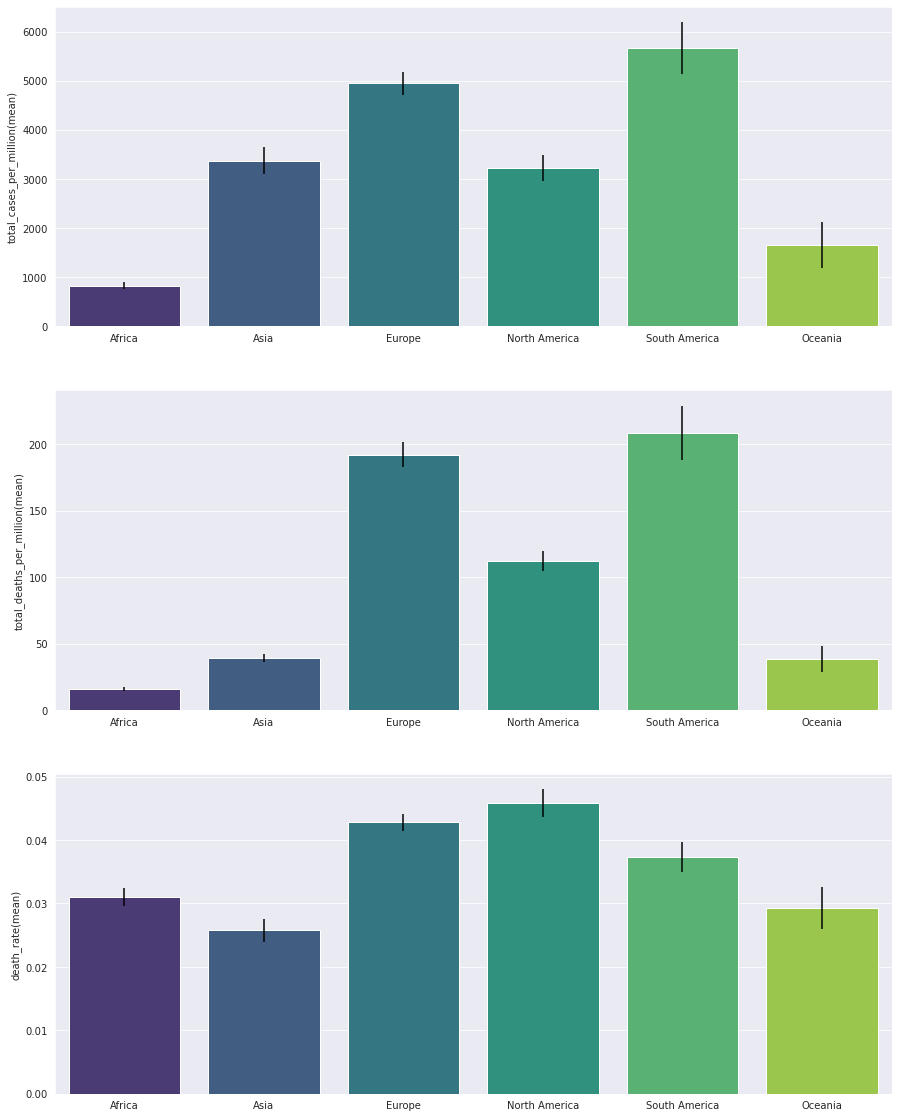

In [45]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']


means_per_continent = []
error_per_continent = []
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

# Find means for the columns we need
for i in continents:
    df_per_continent = df.loc[df.continent == i]
    means_per_continent.append([df_per_continent['total_cases_per_million'].mean(),
                                df_per_continent['total_deaths_per_million'].mean(),
                                df_per_continent['death_rate'].mean()])
    error_per_continent.append([2*df_per_continent['total_cases_per_million'].sem(),
                                2*df_per_continent['total_deaths_per_million'].sem(),
                                2*df_per_continent['death_rate'].sem()])

# Create the DataFrame
df2 = pd.DataFrame(means_per_continent,
                   index =continents,
                   columns = ['total_cases_per_million(mean)', 'total_deaths_per_million(mean)', 'death_rate(mean)'])

# Display the bar plots with error bars
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [2*x[i] for x in error_per_continent]
    plt.subplot(3,1,i+1)
    if i==0: g =sns.barplot(x= continents, y= 'total_cases_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    elif i==1: g =sns.barplot(x= continents, y= 'total_deaths_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    else: g =sns.barplot(x= continents, y= 'death_rate(mean)', data= df2, yerr= sem_error, palette='viridis')


$\;\;\;$An interesting observation so far is the very reduced value of the average *total_deaths_per_million* index of Asia.

In [46]:
df2

,total_cases_per_million(mean),total_deaths_per_million(mean),death_rate(mean)
Africa,831.266425,15.845250,0.030959
Asia,3369.603168,39.146248,0.025757
Europe,4949.272035,192.222052,0.042789
North America,3220.203768,112.029893,0.045817
South America,5670.275033,208.757890,0.037324
Oceania,1657.675210,38.153290,0.029252


### t-test calculation.

In [47]:
from scipy.stats import ttest_ind
def ttest(cont1, cont2, i):
    if i==0:
        test_cases = ttest_ind(df.loc[df.continent==cont1].total_cases_per_million.values,
                         df.loc[df.continent==cont2].total_cases_per_million.values, nan_policy='omit')
        return ('%.3f'%(test_cases.pvalue))
    elif i==1:
        test_deaths = ttest_ind(df.loc[df.continent==cont1].total_deaths_per_million.values,
                         df.loc[df.continent==cont2].total_deaths_per_million.values, nan_policy='omit')
        return ('%.3f'%(test_deaths.pvalue))
    else:
        test_ratio = ttest_ind(df.loc[df.continent==cont1].death_rate.values,
                         df.loc[df.continent==cont2].death_rate.values, nan_policy='omit')
        return ('%.3f'%(test_ratio.pvalue))

In [48]:
data_ttest = pd.DataFrame(index = continents, columns = continents)
for k in range(3):
    for i in range(6):
        for j in continents:
            data_ttest[j].values[i] = ttest(data_ttest.index[i], j, k)

    if k == 0:
        print('\033[1m'+'\033[4m'+'t-tests for means of total_cases_per_million'+'\033[0m')
        print(data_ttest)
    elif k==1:
        print()
        print('\033[1m'+'\033[4m'+'t-tests for means of total_deaths_per_million'+'\033[0m')
        print(data_ttest)
    else :
        print()
        print('\033[1m'+'\033[4m'+'t-tests for means of death_ratio'+'\033[0m')
        print(data_ttest)

t-tests for means of total_cases_per_million
              Africa   Asia Europe North America South America Oceania
Africa         1.000  0.000  0.000         0.000         0.000   0.000
Asia           0.000  1.000  0.000         0.126         0.000   0.000
Europe         0.000  0.000  1.000         0.000         0.000   0.000
North America  0.000  0.126  0.000         1.000         0.000   0.000
South America  0.000  0.000  0.000         0.000         1.000   0.000
Oceania        0.000  0.000  0.000         0.000         0.000   1.000

t-tests for means of total_deaths_per_million
              Africa   Asia Europe North America South America Oceania
Africa         1.000  0.000  0.000         0.000         0.000   0.000
Asia           0.000  1.000  0.000         0.000         0.000   0.645
Europe         0.000  0.000  1.000         0.000         0.002   0.000
North America  0.000  0.000  0.000         1.000         0.000   0.000
South America  0.000  0.000  0.002         0.000        

$\;\;\;$For the values of the average indices **total_cases_per_million** for each continent we observe that Null Hypothesis is not discarded - that is, these differences in the averages are not statistically significant - between the continents Asia-North America. This is also visible in the graph where in the bar for the standard error of the two continents there is an overlap and the t-test comes to confirm the visual suspicion.<br>
$\;\;\;$For the average values of **total_deaths_per_million** there is no statistical interest for the continents Oceania and Asia because the value of p-value is greater than 0.05. While for the index **death_ratio** this is observed between the continents of Oceania and Africa. In both cases there is also an overlap of the error bars in the above diagrams.<br><br>
$\;\;\;$*For the above diagrams and for the calculations of the t-tests we assume that there is a normal distribution of our data, for this we consider up to 95% of the confidence intervals in the error bars the interval (μ-2*se, μ+2*se)*

In [49]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','new_cases',
          'new_deaths']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Get datetime objects from date column
df = df.loc[df.location != 'International']
df = df.loc[df.location != 'World']
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.sort_values(by = ['date', 'iso_code'])


#### Calculation of new cases, new total number of deaths, and their cause for all continents.


In [50]:
from scipy import stats
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
np.seterr(all='ignore')
error = []

for i in range(1,12):
    data = df.loc[df.month == i]   
    ratio_today = data.new_deaths.values/data.new_cases.values

    cases_monthly.append(data.new_cases.mean())
    deaths_monthly.append(data.new_deaths.mean() )
    ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(data.new_deaths.values/data.new_cases.values)])))
    error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])


In [51]:
# Creating the dataframe we want for our visualization
from datetime import datetime
new_df = pd.DataFrame({'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly, 'ratio_monthly':ratio_monthly})
new_df.index+=1
months = np.array([])

for x in new_df.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
    
new_df = new_df.set_index(months)
new_df.index.name = 'month'


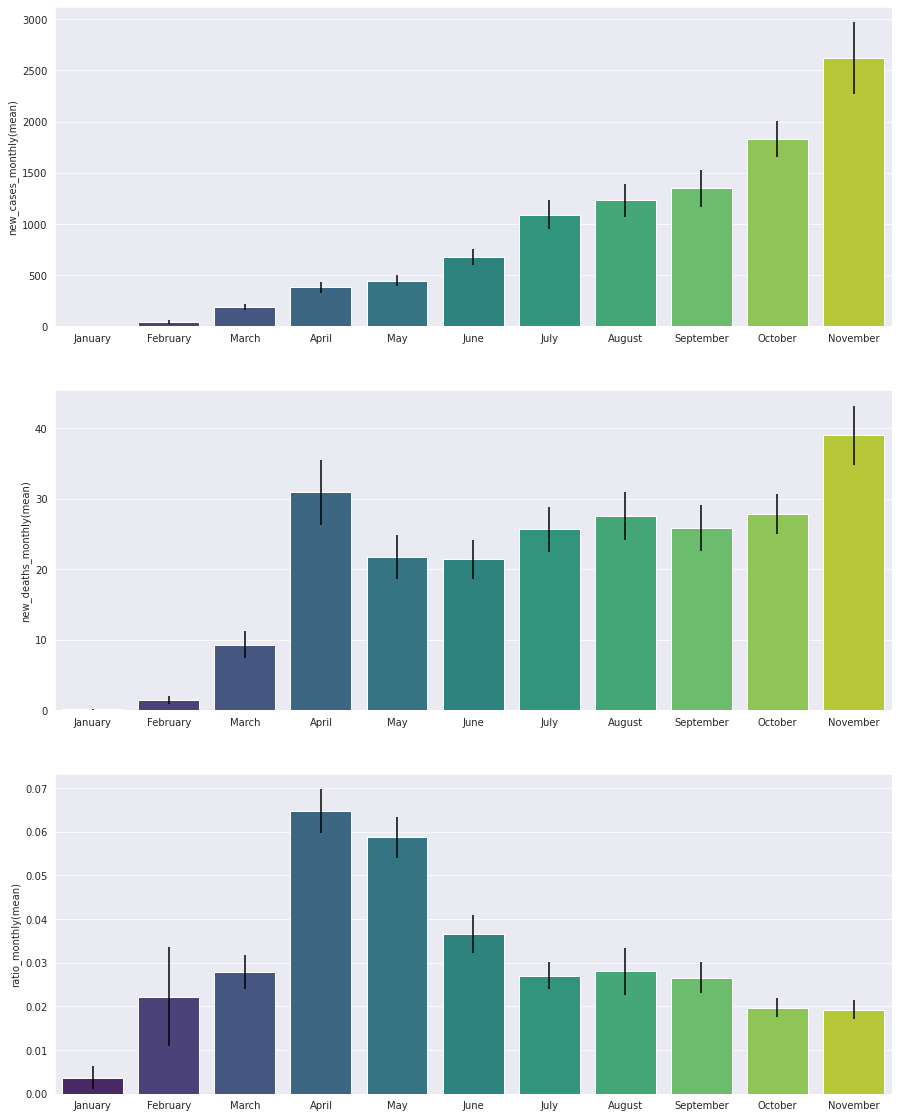

In [52]:
# Display our bar plots for all continents together
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [2*x[i] for x in error]
    plt.subplot(3,1,i+1)
    if i==0:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_cases_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_cases_monthly(mean)')
    elif i==1:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_deaths_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_deaths_monthly(mean)')
    else:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.ratio_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='ratio_monthly(mean)')

$\;\;\;$From the first diagrams we observe an exponential increase in cases per month and steady death rates per month from April to October. Impressive is the fact that while the average number of cases per month increases from month to month, the same death rate remains stable or decreases, until November when there is an explosion in both cases and deaths. Also interesting is the last graph, where the highest death rate is for the months of April and May, while after even in November it is quite low. <br>
--Personal thinking - Intuitively only, what we understand from this is that there were not enough diagnoses of the virus (tests), as the number of tests performed was extremely low compared to the following months, so the death rate / cases are somewhat fictitious and in fact much lower in the levels of the coming months. Simply put, the whole population was not tested but tested in critical cases in hospitals where it was unavoidable. This is just a thought to justify the high death rates in April and May .--

$\;\;\;$*For the above diagrams we assume that there is a normal distribution of our data, for this we consider as 95% of confidence intervals in error bars the interval (μ-2*se, μ+2*se)*

### The number of cases is increasing exponentially.

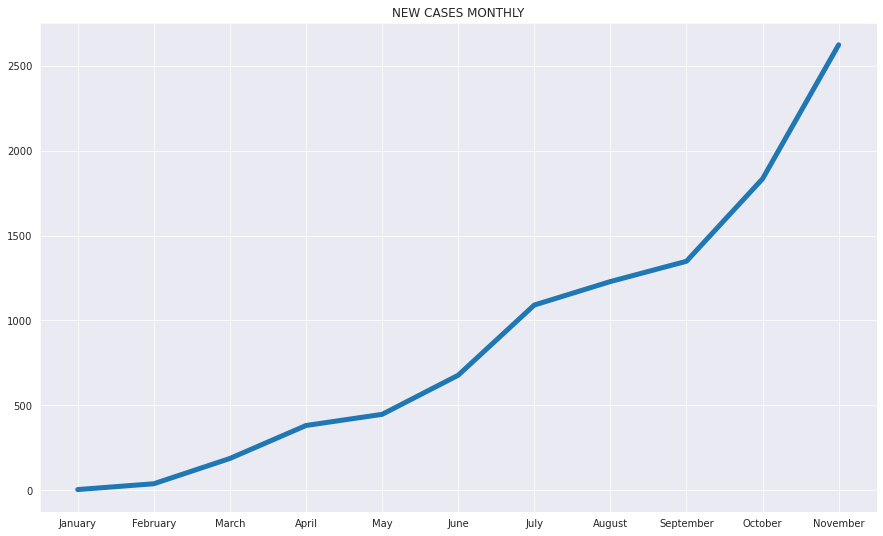

In [53]:
fig = plt.figure(figsize=(15,9))
g = sns.lineplot(data=new_df, x=new_df.index.tolist(), y=new_df.new_cases_monthly.tolist(), linewidth=5, sort=False)
g.set_title("NEW CASES MONTHLY");

#### Calculation of new cases, new total number of deaths, and their reason for each continent separately.


In [54]:
# Do the same process but for each continent separately
from scipy import stats
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
error = []
np.seterr(all='ignore')

for i in range(1,12):
    
    for j in range(len(continents)):
        data = df.loc[df.month == i]
        data = data.loc[data.continent == continents[j]]
        # Actually here we calc the mean of cases and deaths and death ratio for each month
        # We could do a big for-loop to parse day-by-day, but the result would be pretty much the same
        # because python gives us huge decimal precision. The difference finding the mean by using sum()
        # for a month than calculate the mean of cases or deaths day by day is: +- 0.0000000001,
        # so no point to parse a month day by day.
        ratio_today = data.new_deaths.values/data.new_cases.values

        cases_monthly.append(data.new_cases.mean())
        deaths_monthly.append(data.new_deaths.mean())
        ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


        error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])

<ipython-input-54-512e89215428>:24: RuntimeWarning: Mean of empty slice
  ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


In [55]:
# Creating the dataframe we need for the visualization
from datetime import datetime
df_continents = pd.DataFrame({'continent':continents*11,'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly,
                              'ratio_monthly':ratio_monthly})

df_continents['sem_new_cases'] = [x[0] for x in error]
df_continents['sem_new_deaths'] = [x[1] for x in error]
df_continents['sem_ratio'] = [x[2] for x in error]

df_continents.to_csv(r'/home/left/Desktop/test.csv')

In [56]:
# This dataframe has 66 rows, because we have 6 continents X 11 months,
# First 6 rows are continents data for January,
# Last 6 rows are continents data for November, etc.
df_continents.tail()

,continent,new_cases_monthly,new_deaths_monthly,ratio_monthly,sem_new_cases,sem_new_deaths,sem_ratio
61,Asia,2013.185990,33.553140,0.015288,223.984237,3.439091,0.00115101
62,Europe,5191.874317,75.178142,0.014701,316.771954,5.009575,0.00111704
63,North America,3947.537037,44.577160,0.023243,852.974290,7.950036,0.00252397
64,Oceania,32.407767,0.233010,0.002795,8.980727,0.077373,0.000824689
65,South America,3479.401709,78.115385,0.036600,459.364110,9.671712,0.00575986


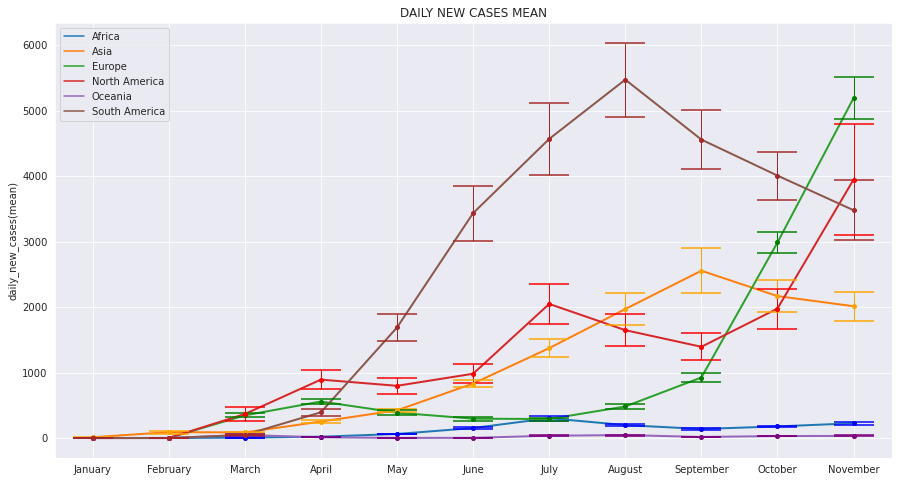

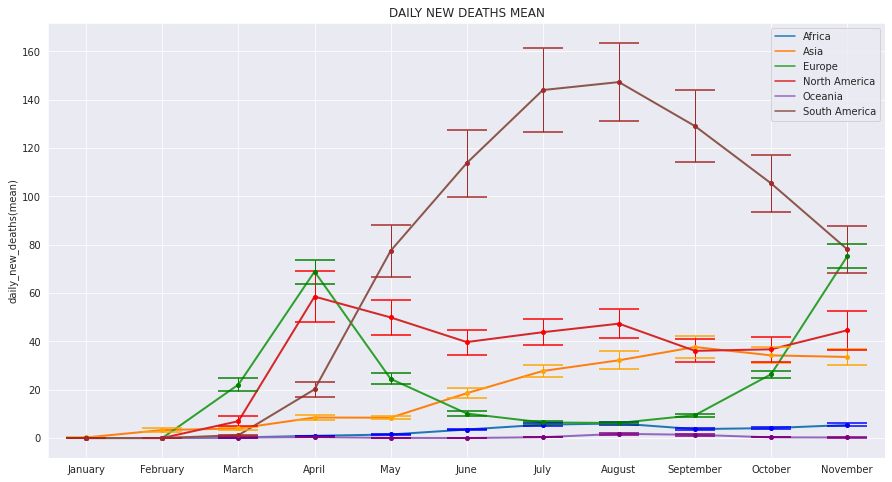

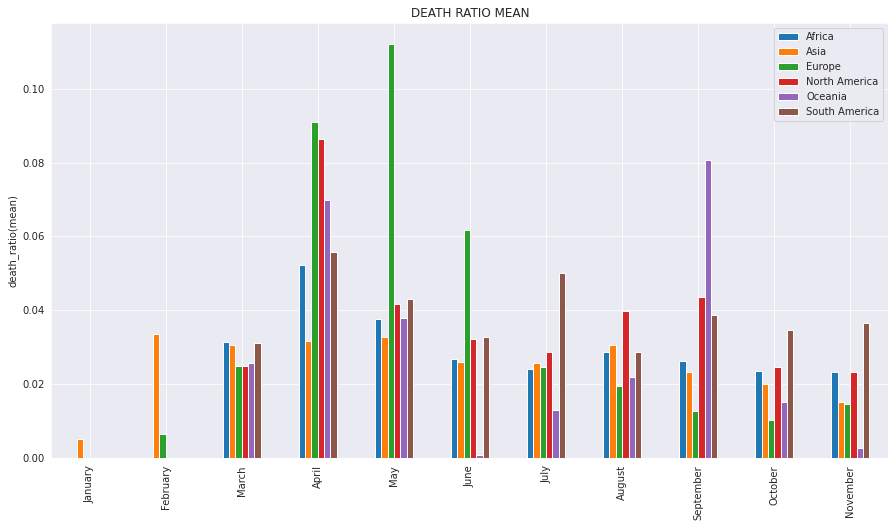

In [57]:
# Now for display all plots using line plots for new_cases_monthly and new_deaths_monthly
# and a bar plot for death_ratio_monthly. That's because Standard Error of the Mean ratio
# is something like 0.000x and with a line plot it is a big confusion.
sns.set_style("darkgrid")
for i in range(3):
    if i == 0:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].new_cases_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].new_cases_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].new_cases_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].new_cases_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].new_cases_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].new_cases_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])

        values=[final['Africa'].values,final['Asia'],final['Europe'],final['North America'],final['Oceania'],final['South America']]

        yerror =[df_continents.loc[df_continents.continent=='Africa'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Asia'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Europe'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='North America'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Oceania'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='South America'].sem_new_cases.values]
        colors=['blue','orange','green','red','purple','brown']

        fig = plt.figure(figsize=(15,8))
        plt.title("DAILY NEW CASES MEAN")
        sns.lineplot(data= final, sort= False, dashes = False, linewidth = 2)
        for j in range(len(values)):
            (_,caps,_)=plt.errorbar(x=range(len(final.index)), y=values[j],elinewidth=1,ecolor=colors[j],
                         yerr=yerror[j],fmt='.',marker='.',markersize=8, capsize=20, mec=colors[j],mfc=colors[j]);
            for cap in caps:
                cap.set_markeredgewidth(1.5)

        plt.ylabel("daily_new_cases(mean)")

    elif i == 1:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].new_deaths_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].new_deaths_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].new_deaths_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].new_deaths_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].new_deaths_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].new_deaths_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])

        values=[final['Africa'].values,final['Asia'],final['Europe'],final['North America'],final['Oceania'],final['South America']]

        yerror =[df_continents.loc[df_continents.continent=='Africa'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Asia'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Europe'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='North America'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Oceania'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='South America'].sem_new_deaths.values]
        colors=['blue','orange','green','red','purple','brown']

        fig = plt.figure(figsize=(15,8))
        plt.title("DAILY NEW DEATHS MEAN")
        sns.lineplot(data= final, sort= False, dashes = False, linewidth = 2)
        for j in range(len(values)):
            (_,caps,_)=plt.errorbar(x=range(len(final.index)), y=values[j],elinewidth=1,ecolor=colors[j],
                         yerr=yerror[j],fmt='.',marker='.',markersize=8, capsize=20, mec=colors[j],mfc=colors[j]);
            for cap in caps:
                cap.set_markeredgewidth(1.5)

        plt.ylabel("daily_new_deaths(mean)")
        
    else:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].ratio_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].ratio_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].ratio_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].ratio_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].ratio_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].ratio_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])
        # Replace masked values to NaN
        final['Africa'].values[0] = None
        final['South America'].values[0] = None
        final['South America'].values[1] = None
        #
        
        # Create the plot
        final.plot(figsize=(15,8),kind='bar')
        plt.title("DEATH RATIO MEAN")
        plt.xlabel(None)
        plt.ylabel("death_ratio(mean)")

$\;\;\;$In the diagrams by continent we see that the situation outside Latin America was controlled in terms of the average number of cases per month. Then for Latin America things are clearly getting better with a noticeable drop in cases but much worse for Europe and North America, while Asia seems to be in control of the second wave. (Oceania and Africa have very small numbers of deaths per month but also deaths per month.) <br>
$\;\;\;$For the daily average of deaths per month we see Latin America in while it started with the largest numbers now it has improved just like with the cases. The same is true of the other continents that seem to handle the second wave at the death rate, with the sole exception of Europe where it is at levels similar to the first wave of the death rate. We see relatively the same rates for each continent in the monthly death rate, except for a few months, where individuals stand out, for example Europe in May and June, Latin America in July and Oceania in September, with almost twice as many in all cases.<br>
$\;\;\;$An interesting observation here is that while we see the United States individually having the highest percentages in all categories, this is not reflected in the charts above, perhaps because the other countries have smaller numbers.

In [95]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Create the dataframe
# Load the data (create the DataFrame)

df_covid = pd.read_csv('/home/left/Desktop/dataMining/set1/united_states_covid19_cases_and_deaths_by_state.csv',
                       skiprows=3)
df_covid = df_covid.rename(columns={'State/Territory': 'State'})
df_votes = pd.read_excel('/home/left/Desktop/dataMining/set1/state-voting.xlsx')

# Combine New York City with New York
new_york = df_covid.loc[df_covid.State == 'New York']
new_york['Case Rate per 100000'].values[0] += 3598
new_york['Death Rate per 100000'].values[0] += 288
df_covid.loc[df_covid.State == 'New York'] = new_york

data = pd.merge(df_votes, df_covid, on=['State'], how='inner')
data['death_ratio_per_100K'] = data['Death Rate per 100000'].values / data['Case Rate per 100000'].values


#### First of all, the columns we need to look at to get a first idea of each state are cases, total deaths and their ratio per 100,000 population. This is because in America there are huge population differences. [Wiki](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population)

In [87]:
votedD = data.loc[data['Vote']=='D']
votedD.reset_index(inplace = True)
votedR = data.loc[data['Vote']=='R']
votedR.reset_index(inplace = True)
sns.set_style("darkgrid")


### $\;\;\;$Initially, it was clear that the states with the highest number of cases voted for the Republicans.

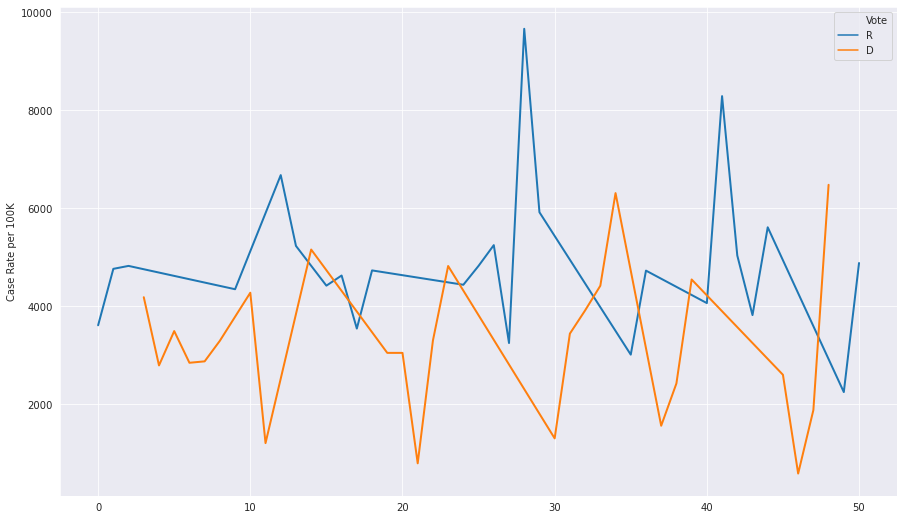

In [89]:
fig = plt.figure(figsize=(15,9))
g = sns.lineplot(data=data, x=data.index.tolist(), hue = data['Vote'],
                 y=data['Case Rate per 100000'].tolist(), sort= False, dashes = False, linewidth = 2)
g.set(ylabel='Case Rate per 100K');

In [91]:
means_for_D = data.loc[data.Vote=='D']
means_for_R = data.loc[data.Vote=='R']

# Barplot values
cases_per_100K_R = means_for_R['Case Rate per 100000'].mean()
deaths_per_100K_R = means_for_R['Death Rate per 100000'].mean()

cases_per_100K_D = means_for_D['Case Rate per 100000'].mean()
deaths_per_100K_D = means_for_D['Death Rate per 100000'].mean()

death_ratio_D = means_for_D['death_ratio_per_100K'].mean()
death_ratio_R = means_for_R['death_ratio_per_100K'].mean()


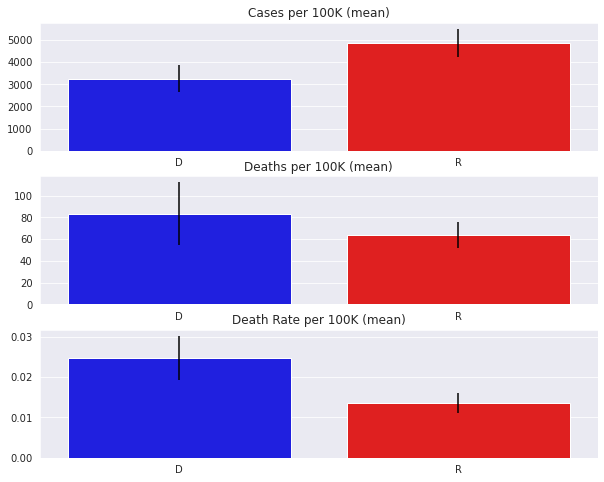

In [92]:
sns.set_style("darkgrid")
y_cases = [cases_per_100K_D,cases_per_100K_R]
y_deaths = [deaths_per_100K_D,deaths_per_100K_R]
y_ratio = [death_ratio_D, death_ratio_R]

fig = plt.figure(figsize=(10,8))
colors = ['blue', 'red']
for i in range(3):
    plt.subplot(3,1,i+1)
    if i==0:
        g = sns.barplot(data = data, x = ['D', 'R'], y=y_cases, palette=colors,
                        yerr= [2*means_for_D['Case Rate per 100000'].sem(),2*means_for_R['Case Rate per 100000'].sem()])
        g.set_title('Cases per 100K (mean)')
    elif i==1:
        g = sns.barplot(data = data, x = ['D', 'R'], y=y_deaths, palette=colors,
                        yerr=[2*means_for_D['Death Rate per 100000'].sem(),2*means_for_R['Death Rate per 100000'].sem()])
        g.set_title('Deaths per 100K (mean)')
    else:
        g = sns.barplot(data = data, x = ['D', 'R'], y=y_ratio, palette=colors,
                        yerr=[2*means_for_D['death_ratio_per_100K'].sem(),2*means_for_R['death_ratio_per_100K'].sem()])
        g.set_title('Death Rate per 100K (mean)')

$\;\;\;$We first observe the average values for each winner per state. While as we first saw in the line plot that the states with the most cases voted for the Republicans here we see that there is a small difference in the average death rate per state, with the states with a slightly higher average death rate voting for the Democrats. But there is a big difference in the death rate compared to the cases where states with the highest percentages voted for the Democrats. To see if these measurements are statistically significant we need to do some tests beyond the bar plots.

$\;\;\;$We will first see how the indexes relate **Case Rate per 100000, Death Rate per 100000 και death_ratio_per_100K.**

In [93]:
from scipy.stats import pearsonr
data['code'] = data['Vote'].astype('category').cat.codes

pear_cases = pearsonr(data['Case Rate per 100000'], data.code)
pear_deaths = pearsonr(data['Death Rate per 100000'], data.code)
pear_ratio = pearsonr(data['death_ratio_per_100K'], data.code)

pearson_data = pd.DataFrame({'PCC': [pear_cases[0],pear_deaths[0],pear_ratio[0]],
                             'p-value': [pear_cases[1],pear_deaths[1],pear_ratio[1]]},
                            index = ['Case Rate per 100K', 'Death Rate per 100K', 'Death/Case Ratio per 100K'])
pearson_data

,PCC,p-value
Case Rate per 100K,0.470158,0.000499
Death Rate per 100K,-0.172527,0.226031
Death/Case Ratio per 100K,-0.470463,0.000494


$\;\;\;$We see that for the Death Rate per 100K there is no correlation as to whether they voted R or D, in contrast to the Case Rate per 100K and the Death / Case Ratio per 100K where in the first index there seems to be a positive correlation, ie as the index per state the more likely they were to vote for a particular party (here for Republicans), in the Death / Case Ratio per 100K there is a negative correlation, and because the values ​​for 'R' or 'D' are essentially 0 or 1, we understand that this index played a role in the outcome of the elections. Both indices are also statistically significant as they reject the null hypothesis, since p-value <0.05. From this analysis we conclude that while the states with a large number of cases on their population chose 'R', on the contrary those with the highest 'Death / Case' percentages chose 'D'.<br><br>
*Υποθέτουμε ότι υπάρχει κανονική κατανομή των συνόλων δεδομένων των δεικτών για να ισχύουν τα παραπάνω.*

### Και ένα διάγραμμα όπου φαίνεται τι ψήφισε κάθε πολιτεία βάση τα ποσοστά θανάτων ανά 100.000 κατοίκους.

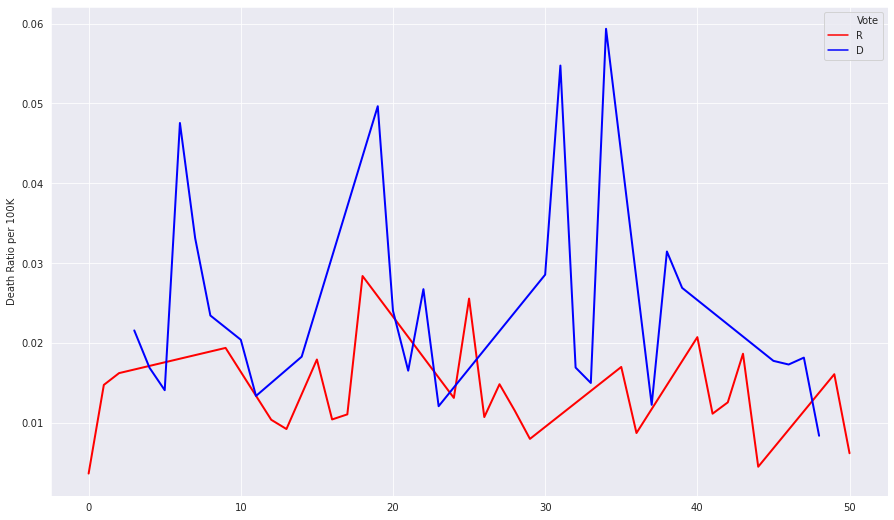

In [94]:
fig = plt.figure(figsize=(15,9))
g = sns.lineplot(data=data, x=data.index.tolist(), hue = data['Vote'],
                 y=data['death_ratio_per_100K'].tolist(), sort= False, dashes = False,palette =['red','blue'], linewidth = 2)
g.set(ylabel='Death Ratio per 100K');